# CMSE 802 In-class assignment: Finite Difference Method for 2D PDEs

## Date: 09/13/2018

### The goal of this assignment is to practice what we have learned about finite difference method for 2D problems. 

---
### Your name: Boyao Zhu

---
### Part 1

**Let us recall the diffusion equation:**

$$ \frac{\partial C}{\partial t} = D \nabla^2 C .$$

**In 2D, this equation can be discretized by central difference scheme in space and Euler's explicit scheme in time. At a grid point $C_{i,j}$, the stencil is**

$$\frac{C_{i,j}^{n+1}-C_{i,j}^{n}}{\Delta t} = D \bigg( \frac{C_{i-1,j}^n - 2 C_{i,j}^n + C_{i+1,j}^n}{\Delta x^2} + \frac{C_{i,j-1}^n - 2 C_{i,j}^n + C_{i,j+1}^n}{\Delta y^2} \bigg),$$

**where the superscript $n$ denotes the $n$-th step.**

### Simulate 2D diffusion  

A dye dropped into water at the center of a square container (5 cm $\times$ 5 cm). The initial concentration distribution is given as

$$C = \sqrt{\frac{t_0}{t}}exp \bigg( \frac{-(\vec{x}-\vec{x}_0)^2}{4Dt} \bigg),$$

where $\vec{x_0} = (x_0, y_0)$ is the position of the point source. 

Because the container is a close system, no-flux boundary conditions should be imposed on the four sides of the doamin. Let's set $t_0 = 500$ s to generate the initial concentration profile. The diffusivity of the dye in water is $10^{-5}$ cm$^2$/s. 

**Complete the code in the cell below.**

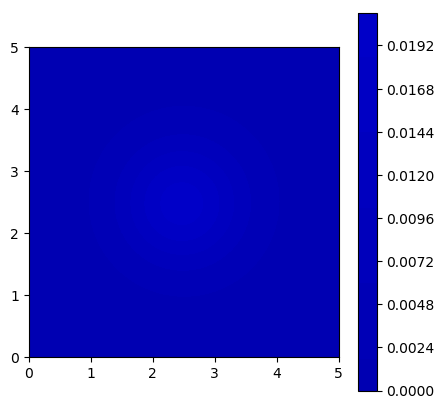

14.2411949634552


In [1]:
# load libraries
import numpy as np
import math
import time 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import display, clear_output

%matplotlib inline

# parameter
tm = 0.0
D = 1.0e-5

# spatial discretization
nx = 101
x = np.linspace(0, 5, nx)

ny = 101
y = np.linspace(0, 5, ny)

dx = x[2] - x[1]
dy = y[2] - y[1]
dt = 0.2*min(dx,dy)**2/D

# meshgrid generate the x and y coordinates of the 2D grid system
xmsh, ymsh = np.meshgrid(x, y)

# position of the center of the drop
x0 = 2.5
y0 = 2.5

# initial condition
C = np.zeros((nx,ny))
t0 = 500.
for i in range(nx):
    for j in range(ny):
        
        dSq =  (x[i]-x0)**2 + (y[j]-y0)**2 # <== fill the blank
        C[i,j] = math.sqrt(t0/t0)*math.exp(-(dSq)/4/D/t0)
                
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], C[0:nx,0:ny], 40, cmap=cm.jet, vmin = -0.02, vmax = 1.0)
plt.colorbar()   
plt.clim(-0.05,1.05)
plt.axes().set_aspect('equal')
plt.show()
        
# wall time before iteration 
WT_bgn = time.time()

# time stepping
for iter in range(300):
    
    # calculate the Laplace at each grid point
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            Lap = (C[i-1,j]-2*C[i,j]+C[i+1,j])/dx**2 + (C[i,j-1]-2*C[i,j]+C[i,j+1])/dy**2   # <== fill the blank
            
            # update concentration at each grid point
            C[i,j] = C[i,j] +dt*D*Lap   # <== fill the blank
            
    
    # no-flux boundary condition
    for i in range(1,nx-1):
        C[i,0] = C[ i, 1]    # <== fill the blank
        C[i,ny-1] = C[ i, ny-2] # <== fill the blank
        
    for j in range(1,ny-1):  
        C[0,j] = C[ 1, j ]    # <== fill the blank
        C[nx-1,j] = C[ nx-2, j ] # <== fill the blank

    # update simulation time    
    tm = tm + dt

    # visualization
    if iter%20 == 0:        
        clear_output(wait=True) # Clear output for dynamic display
        
        fig = plt.figure(figsize=(5, 5), dpi=100)
        plt.contourf(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], C[0:nx,0:ny], 40, cmap=cm.jet, vmin = -0.02, vmax = 1.0)
        plt.colorbar()   
        plt.clim(-0.05,1.05)
        plt.axes().set_aspect('equal')
        plt.show()
        time.sleep(0.1)         # Sleep for half a second to slow down the animation
                 

        
# wall time after iteration         
WT_end = time.time()    

# computer time for the iterations
print(WT_end - WT_bgn)

---
### Part 2 
### Vectorized calculation
In the code above, the value at each grid point is calculated sequentially by looping over i and j indices. In most programming languages, a vectorized calculation can be done. For example, $\mathbf{C} = \mathbf{A} + \mathbf{B}$, where $ \mathbf{A}$ anf $ \mathbf{B}$ are two vectors. Such operation is much faster than looping over the indices. In the next code, we will use vectorized operation to do the same work in the previous code.


**Complete the code below.**

In [ ]:
import numpy as np

A = np.zeros(20)
B = np.zeros(20)
C = np.zeros(20)

for i in range(20):
    A[i] = 2*i**2
    B[i] = 5*i**3
    
# sequential code for C = A + B    
for i in range(20):
    C[i] = A[i] + B[i]

print(C)

# vectorized code for C = A + B    
C[ ] = A[ ] + B[ ]  #<== fill the blank

print(C)

**Let us use vectorized operations to simulate 2D diffusion. Observe the code below and fill up the blank to make the code work.**

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


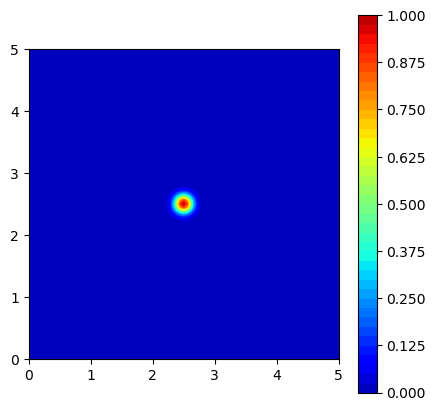

In [2]:
# load libraries
import numpy as np
import math
import time 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display, clear_output

%matplotlib inline


# parameter
tm = 0.0
D = 1.0e-5

# spatial discretization
nx = 101
x = np.linspace(0, 5, nx)

ny = 101
y = np.linspace(0, 5, ny)

# meshgrid generate the x and y coordinates of the 2D grid system
xmsh, ymsh = np.meshgrid(x, y)

dx = x[2] - x[1]
dy = y[2] - y[1]
dt = 0.2*min(dx,dy)**2/D


x0 = 2.5
y0 = 2.5

# initial condition
t0 = 500.

C = np.zeros((nx,ny))
dSq = np.zeros((nx,ny))

# note that intial C is calculated using vectorized calculation
dSq[0:nx,0:ny] = (xmsh[0:nx,0:ny]-x0)**2 + (ymsh[0:nx,0:ny]-y0)**2   #<== fill the blank
C[0:nx,0:ny] = math.sqrt(t0/t0)*np.exp(-(dSq[0:nx,0:ny])/4/D/t0)      #<== fill the blank

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], C[0:nx,0:ny], 40, cmap=cm.jet, vmin = -0.02, vmax = 1.0)
plt.colorbar()   
plt.clim(-0.05,1.05)
plt.axes().set_aspect('equal')
plt.show()

# Laplace at each grid point
Lap = np.zeros((nx,ny))  


# wall time before iteration 
# WT_bgn = time.time()

# # time stepping
# for iter in range(1001):
    
#     # 
#     Lap[1:nx-1,1:ny-1] = (C[ , ] - 2*C[ , ] + C[ , ])/dx**2 + \
#                          (C[ , ] - 2*C[ , ] + C[ , ])/dy**2
    
#     # update the concentration using vectorized calculation
#     C[1:nx-1,1:ny-1] = C[ , ] + dt*D*Lap[ , ]
    
    
#     # no-flux boundary condition
#     C[ , ] = C[ , ]
#     C[ , ] = C[ , ]
    
#     C[ , ] = C[ , ]
#     C[ , ] = C[ , ]
    
    
#     # update simulation time
#     tm = tm + dt

#     # visualization
#     if iter%20 == 0:        
#         clear_output(wait=True) # Clear output for dynamic display
        
# #         fig = plt.figure(figsize=(5, 5), dpi=100)
# #         plt.contourf(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], C[0:nx,0:ny], 40, cmap=cm.jet, vmin = -0.02, vmax = 1.0)
# #         plt.colorbar()   
# #         plt.clim(-0.05,1.05)
# #         plt.axes().set_aspect('equal')

#         fig = plt.figure(figsize=(11, 7), dpi=100)
#         ax = fig.gca(projection='3d')
#         ax.plot_surface(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], C[0:nx,0:ny],cmap=cm.jet)
#         ax.set_zlim3d(0,1)
        
#         display(fig)            # Reset display
#         fig.clear()             # Prevent overlapping and layered plots
#         time.sleep(0.02)         # Sleep for half a second to slow down the animation
        

# # wall time after iteration     
# WT_end = time.time()    

# print(WT_end - WT_bgn)   

**If you have made the code work, it is good.**

<font color=red>**Question:**</font> **Now, markdown the parts of visualization in the sequential code and vectorized code. Rerun the two codes to compare the computer times. How much faster is the vectorized code? Please restart the kernel before each run.**

**Your answer:**

---
### Part 3
### Diffusion with non-constant diffusivity

**Diffusivity is not always a constant value throughout a diffusion domain in reality. In such cases, the diffusion equation becomes**

$$ \frac{\partial C}{\partial t} = \nabla \cdot D \nabla C .$$

** The 2D finite difference stencil is given as**

$$\frac{C_{i,j}^{n+1}-C_{i,j}^{n}}{\Delta t} =  \frac{1}{\Delta x}\bigg( \frac{D_{i+1,j}+D_{i,j}}{2} \cdot \frac{C_{i+1,j}^n - C_{i,j}^n}{\Delta x} - \frac{D_{i,j}+D_{i-1,j}}{2} \cdot \frac{C_{i,j}^n - C_{i-1,j}^n}{\Delta x}\bigg) + \\  \frac{1}{\Delta y}\bigg( \frac{D_{i,j+1}+D_{i,j}}{2} \cdot \frac{C_{i,j+1}^n - C_{i,j}^n}{\Delta y} - \frac{D_{i,j}+D_{i,j-1}}{2} \cdot \frac{C_{i,j}^n - C_{i,j-1}^n}{\Delta y}\bigg).$$



**The cell below creates a spatially variant diffusivity, with an ellisoidal inclusion that has diffusivity to be 0.01 while the matrix has diffusivity to be 1. **

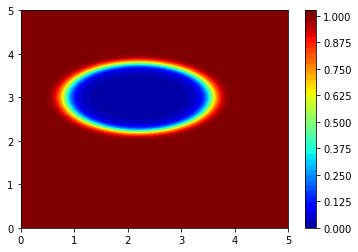

In [6]:
import numpy as np
import math
import time 

import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, clear_output

%matplotlib inline

# spatial discretization
nx = 101
x = np.linspace(0, 5, nx)

ny = 101
y = np.linspace(0, 5, ny)

# meshgrid generate the x and y coordinates of the 2D grid system
xmsh, ymsh = np.meshgrid(x, y)

D = np.zeros((nx,ny))

for i in range(0,nx):
    for j in range(0,ny):
        
        rad =  math.sqrt((xmsh[i,j]-2.2)**2/3 + (ymsh[i,j]-3.0)**2)
        D[i,j] = 0.5*(1.0+math.tanh((rad-0.8)/0.1))+0.02
        
plt.contourf(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], D[0:nx,0:ny], 40, cmap=cm.jet, vmin = -0.02, vmax = 1.0)
plt.colorbar() 


**Let us simulate a 2D diffusion through the square domain. Set a fix value $C = 1$ at top boundary and $C=0$ at the bottom boundary, and no-flux boundary condition on the two remaining sides. **

**Complete the code below.**

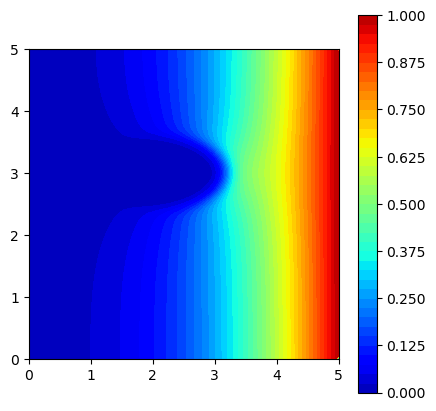

In [ ]:


dx = x[2]-x[1]
dy = y[2]-y[1]

dt = 0.2*min(dx,dy)**2/np.amax(D)

C = np.zeros((nx,ny))  

# time stepping
for iter in range(3001):
    
    # calculate the Laplace at each grid point
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            Lap = ((D[i+1,j]+D[i,j])*(C[i+1,j]-C[i,j]) - (D[i,j]+D[i-1,j])*(C[i,j]-C[i-1,j]))/(2*dx**2) + ((D[i,j+1]+D[i,j])*(C[i,j+1]-C[i,j]) - (D[i,j]+D[i,j-1])*(C[i,j]-C[i,j-1]))/(2*dy**2)
            # update concentration at each grid point
            C[i,j] = Lap*dt+C[i,j]    # <== fill the blank    
            
    # boundary condition
    for i in range(1,nx-1):
        C[i,0] = 0
        C[i,ny-1] = 1
        
    for j in range(1,ny-1):  
        C[0,j] = C[1,j]    # <== fill the blank
        C[nx-1,j] = C[nx-2,j] # <== fill the blank   
        
    # update simulation time    
    tm = tm + dt

    # visualization
    if iter%20 == 0:        
        clear_output(wait=True) # Clear output for dynamic display
        
        fig = plt.figure(figsize=(5, 5), dpi=100)
        plt.contourf(xmsh[0:nx,0:ny], ymsh[0:nx,0:ny], C[0:nx,0:ny], 40, cmap=cm.jet, vmin = -0.02, vmax = 1.0)
        plt.colorbar()   
        plt.clim(-0.05,1.05)
        plt.axes().set_aspect('equal')
        plt.show()
        time.sleep(0.1)         # Sleep for half a second to slow down the animation        

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignment > In-class Assignment 20180913".